<a href="https://colab.research.google.com/github/AmirHoseein99/project_and_challenges/blob/master/MusicGenreClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras 

In [ ]:
! wget "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/26781/2093808/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1640108237&Signature=I5i5ehVSb7cGEMuM2nWdxvwYls%2BbotbsLIudzDySpTlTulkcAwYerPVe0iyRXb6WLaidoLkXnckkfs8K1usg9CUccKrDGTnoWTuYnvuMnZNZo%2BDdJIeysjdm6Fg3j%2Bbx9iqtHjL7robZuBtetdXUK1%2BiPzdTuK1skovt7zzTks%2By2NNDZpA0YaDKd3R8srXgUFIPPjJChCIdiHHd%2BuGenBR%2BAtgEd5VD4WQOC5mIE%2BEUaOkhvBYrVDHTyxOUXNDwwt4yhWGT0U6ilCwPyClf1GBIWANIm71Tt3FnTKyIv6imRBeBpi5lb1gelsoC5lvwU7PAqm3OyksWFax%2FTtGdAA%3D%3D&response-content-disposition=attachment%3B+filename%3Drnn-competition-2020-2021.zip"

In [ ]:
!unzip "/content/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1640108237&Signature=I5i5ehVSb7cGEMuM2nWdxvwYls+botbsLIudzDySpTlTulkcAwYerPVe0iyRXb6WLaidoLkXnckkfs8K1usg9CUccKrDGTnoWTuYnvuMnZNZo+DdJIeysjdm6Fg3j+bx9iqtH"

In [ ]:
train_ds = pd.read_csv("/content/train.csv")
train_ds.columns = ["lyric", "target"]
test_ds = pd.read_csv("/content/test.csv")
test_ds = test_ds.drop(["id"], axis=1)

In [ ]:
train_ds.head()

,lyric,target
0,Can't drink without thinkin' about you,1
1,Now Lil Pump flyin' private jet (Yuh),0
2,"No, matter fact, you ain't help me when I had ...",0
3,"And you could find me, I ain't hidin'",0
4,From the way you talk to the way you move,1


In [ ]:
lyric = train_ds.lyric.to_numpy()
targets = train_ds.target.to_numpy()

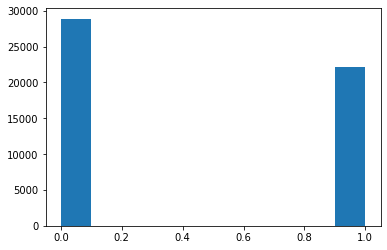

In [ ]:
_ = plt.hist(targets)

In [ ]:
from keras.preprocessing.text import Tokenizer
lyrics_tokens = Tokenizer()
lyrics_tokens.fit_on_texts(lyric)
encoded_lyric = np.array(lyrics_tokens.texts_to_sequences(lyric), dtype=object)
word_index = lyrics_tokens.word_index
vocab_size = len(word_index)

In [ ]:
lengths=[]
for k in range(len(encoded_lyric)):
  lengths.append(len(encoded_lyric[k]))

In [ ]:
pd.DataFrame(lengths, columns=['Lenghts']).describe()

,Lenghts
count,51054.000000
mean,8.236495
std,2.942687
min,1.000000
25%,6.000000
50%,8.000000
75%,10.000000
max,74.000000


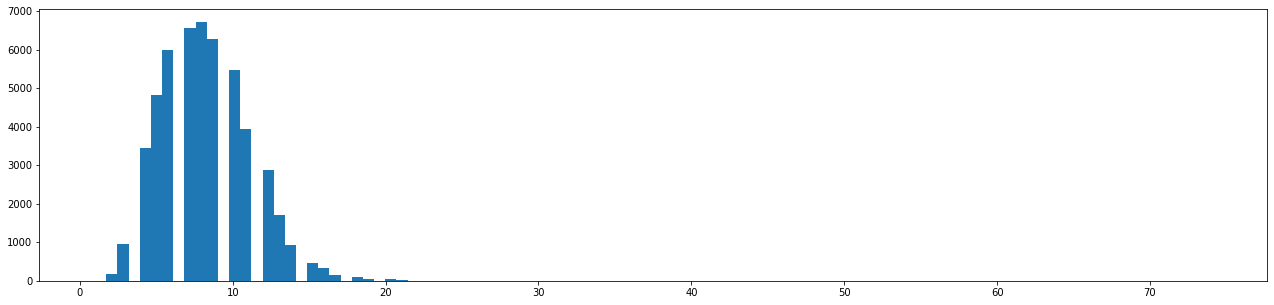

In [ ]:
plt.figure(figsize=(22, 5))
plt.hist(lengths, bins=100)
plt.show()

In [ ]:
from keras.preprocessing.sequence import pad_sequences
max_length = 20
trunc_type = 'post'
padding_type = 'post'
lyrics_padded = pad_sequences(encoded_lyric, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
print(len(encoded_lyric[0]))
print(len(lyrics_padded[0]))


print(len(encoded_lyric[1]))
print(len(lyrics_padded[1]))

print(len(encoded_lyric[10]))
print(len(lyrics_padded[10]))

6
20
7
20
14
20


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(lyrics_padded, targets, test_size=.1)

In [ ]:
embed_size = 128
num_oov_buckets = 300
model = keras.models.Sequential([
    keras.layers.Embedding(vocab_size + num_oov_buckets, embed_size,
    input_shape=[None]),
    keras.layers.GRU(64),
    keras.layers.Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, None, 128)         1927936   
                                                                 
 gru_20 (GRU)                (None, 64)                37248     
                                                                 
 dense_22 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,965,249
Trainable params: 1,965,249
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy', tf.keras.metrics.AUC()])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, verbose=1, batch_size = 32, validation_data=(X_valid, y_valid))

Epoch 1/20
1436/1436 [==============================] - 22s 12ms/step - loss: 0.4821 - accuracy: 0.7658 - auc_14: 0.8448 - val_loss: 0.4219 - val_accuracy: 0.8118 - val_auc_14: 0.8878
Epoch 2/20
1436/1436 [==============================] - 16s 11ms/step - loss: 0.3499 - accuracy: 0.8516 - auc_14: 0.9224 - val_loss: 0.3888 - val_accuracy: 0.8310 - val_auc_14: 0.9052
Epoch 3/20
1436/1436 [==============================] - 17s 12ms/step - loss: 0.2719 - accuracy: 0.8895 - auc_14: 0.9533 - val_loss: 0.3900 - val_accuracy: 0.8408 - val_auc_14: 0.9105
Epoch 4/20
1436/1436 [==============================] - 16s 11ms/step - loss: 0.2181 - accuracy: 0.9144 - auc_14: 0.9699 - val_loss: 0.4076 - val_accuracy: 0.8492 - val_auc_14: 0.9102
Epoch 5/20
1436/1436 [==============================] - 17s 12ms/step - loss: 0.1800 - accuracy: 0.9287 - auc_14: 0.9793 - val_loss: 0.4216 - val_accuracy: 0.8429 - val_auc_14: 0.9083
Epoch 6/20
1436/1436 [==============================] - 17s 12ms/step - loss: 0.

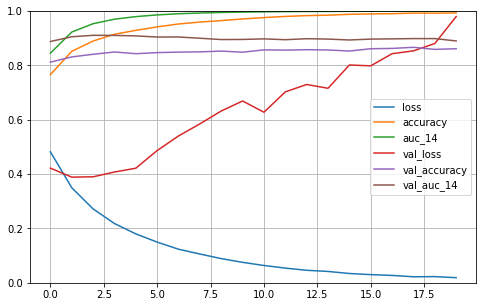

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()